In [4]:
import numpy as np
from copy import deepcopy
from PIL import Image
import cv2
import scipy.signal
from scipy.signal import argrelextrema
from skimage.filters.rank import entropy
from skimage.morphology import disk
import argparse
import cmapy
from matplotlib.colors import hsv_to_rgb
from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.image as mimage

In [2]:
def filter_entropy_image(image, filter):
	
	eimage = entropy(image, disk(3))

	new_picture =  np.ndarray(shape=eimage.shape) #[[False] * image.shape[1]] * image.shape[0]

	for rn, row in enumerate(eimage):
	
		for pn, pixel in enumerate(row):

			if pixel < filter:
				
				new_picture[rn,pn] = True

			else:
				new_picture[rn,pn] = False

	return new_picture.astype('b')

Text(0.5, 1.0, 'grayscale image')

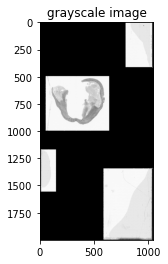

In [9]:
ORO = cv2.imread("/Users/ys2af/Writing lab/entropy method/sample_images/converted_tiffs/fig3_converted/Fig_C_AE1354.UMC.SR.20150911.macro.tiff",0)
plt.figure()
plt.imshow(ORO,cmap="gray")
plt.title('grayscale image')

Text(0.5, 1.0, 'Local entropy')

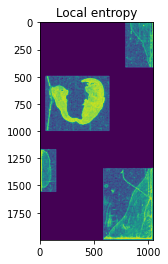

In [10]:
source = deepcopy(ORO)
ent = entropy(source, disk(3))
plt.figure()
plt.imshow(ent,  cmap='viridis')
plt.title('Local entropy')

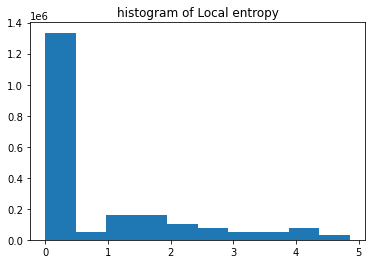

In [15]:
plt.title('histogram of Local entropy')
plt.hist(ent.ravel())
plt.show() 


In [16]:
hist = list(np.histogram(ent,30))

minindex = list(argrelextrema(hist[0], np.less))

for i in range(len(minindex[0])):
    temp_thresh = hist[1][minindex[0][i]]
    if temp_thresh>1 and temp_thresh<4:
        thresh_localminimal = temp_thresh
       
thresh1 = (255*filter_entropy_image(ORO, thresh_localminimal)).astype('uint8')

mask_255 = cv2.bitwise_not(deepcopy(thresh1))

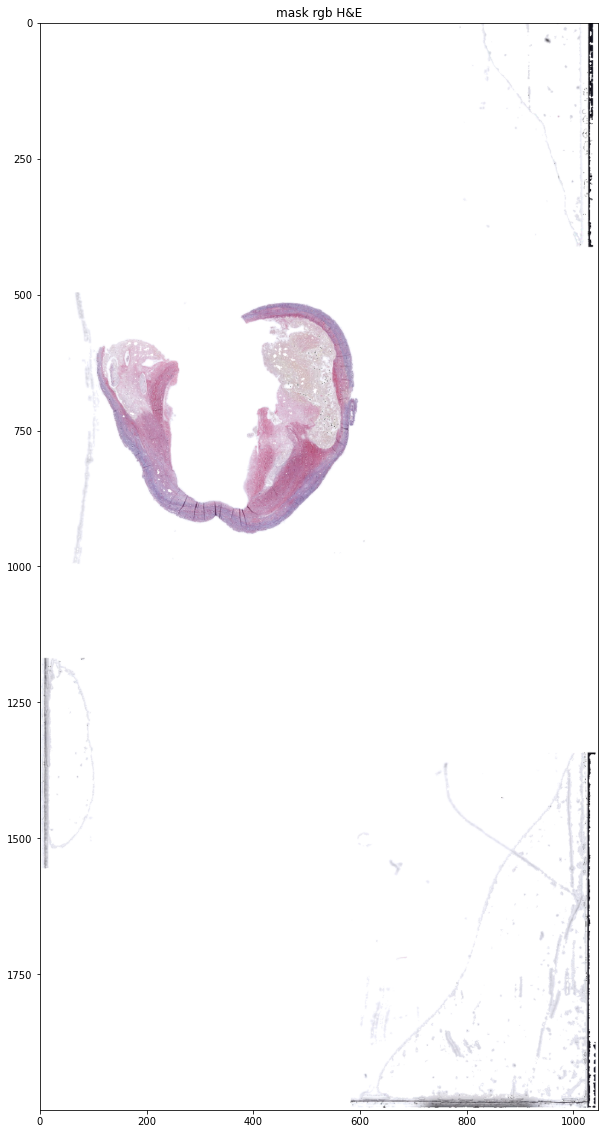

In [21]:
test_tile = cv2.imread("/Users/ys2af/Writing lab/entropy method/sample_images/converted_tiffs/fig3_converted/Fig_C_AE1354.UMC.SR.20150911.macro.tiff",1)
thresh1_3d = np.stack((thresh1,thresh1,thresh1),axis = -1)
mask_test_tile_pre = cv2.bitwise_and(test_tile, test_tile, mask=mask_255)

mask_test_tile = cv2.add(mask_test_tile_pre, thresh1_3d)

plt.figure(figsize = (10,20))
plt.title('mask rgb H&E')
plt.imshow(cv2.cvtColor(mask_test_tile, cv2.COLOR_BGR2RGB),aspect='auto')

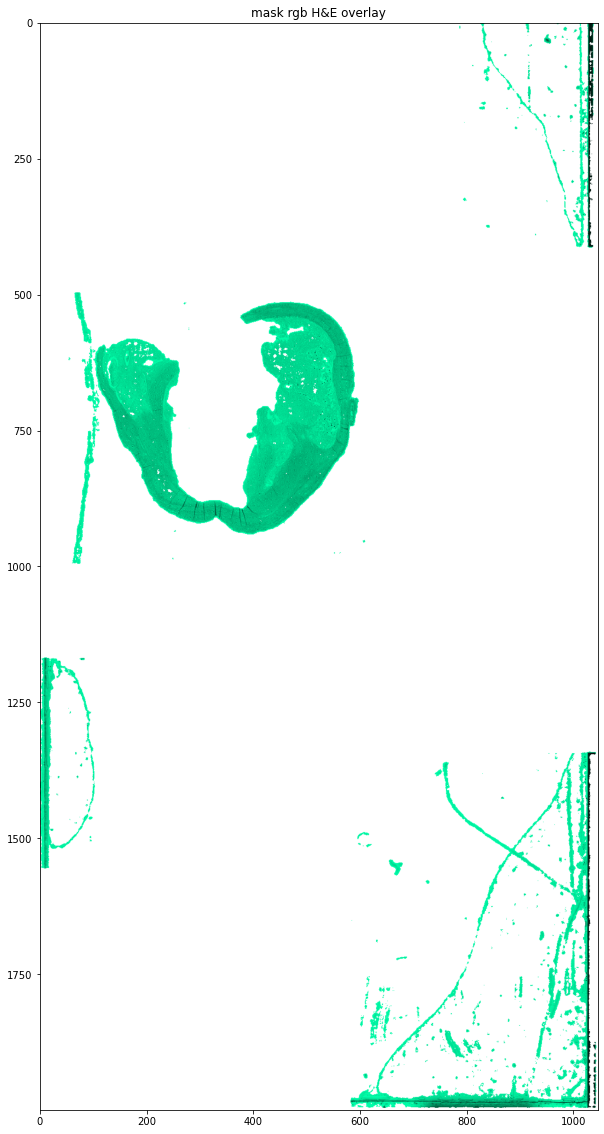

In [24]:
mask_255_bool = np.array(mask_255, dtype=bool)
test_tile_hsv = cv2.cvtColor(mask_test_tile, cv2.COLOR_BGR2HSV)
test_tile_hsv[mask_255_bool, 0] = 80
test_tile_hsv[mask_255_bool, 1] = 255
test_tile_bgr = cv2.cvtColor(test_tile_hsv, cv2.COLOR_HSV2BGR)
plt.figure(figsize = (10,20))
plt.title('mask rgb H&E overlay')
plt.imshow(cv2.cvtColor(test_tile_bgr, cv2.COLOR_BGR2RGB),aspect='auto')